# User Acquisition and Customer Lifetime Value Analysis

In this project, I analyze a marketing dataset containing customer acquisition information, marketing spend, and customer activity metrics.  
The goal is to calculate key performance metrics such as:
- Customer Acquisition Cost (CAC)
- Customer Lifetime Value (LTV)
- Return on Investment (ROI)
- Channel performance comparison

This project demonstrates my skills in data cleaning, analysis, visualization, and business insights generation.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/enhanced_dataset.csv')
df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Date_Acquired,Total_Revenue,Days_Active,Customer_Lifetime_Value
0,CUST0001,Email Marketing,3489.027844,16,2023-03-12,2135.59,6,355.93
1,CUST0002,Online Ads,1107.865808,33,2023-01-27,4535.14,36,125.98
2,CUST0003,Social Media,2576.081025,44,2023-01-25,1581.38,84,18.83
3,CUST0004,Online Ads,3257.567932,32,2023-01-17,3416.79,7,488.11
4,CUST0005,Email Marketing,1108.408185,13,2023-02-01,880.99,87,10.13


## Basic Exploration

In [16]:
# Check missing values
print(df.isnull().sum())
print("---------")

# Basic info
print(df.info())
print("---------")

# Quick summary statistics
df.describe()



Customer_ID                0
Marketing_Channel          0
Marketing_Spend            0
New_Customers              0
Date_Acquired              0
Total_Revenue              0
Days_Active                0
Customer_Lifetime_Value    0
dtype: int64
---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              500 non-null    object 
 1   Marketing_Channel        500 non-null    object 
 2   Marketing_Spend          500 non-null    float64
 3   New_Customers            500 non-null    int64  
 4   Date_Acquired            500 non-null    object 
 5   Total_Revenue            500 non-null    float64
 6   Days_Active              500 non-null    int64  
 7   Customer_Lifetime_Value  500 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 31.4+ KB
None
---------


,Marketing_Spend,New_Customers,Total_Revenue,Days_Active,Customer_Lifetime_Value
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3094.726549,30.070000,2543.704000,51.544000,134.692020
std,1136.628605,11.754209,1397.333744,27.919223,414.970873
min,1010.702890,10.000000,102.370000,1.000000,1.580000
25%,2131.835093,19.000000,1370.160000,28.750000,26.730000
50%,3155.976673,31.000000,2555.320000,54.000000,48.470000
75%,4027.494116,40.000000,3704.737500,74.000000,92.062500
max,4999.631314,50.000000,4982.560000,99.000000,4775.070000


## Calculate Key Metrics
- Customer Acquisition Cost (CAC)
- Lifetime Value (LTV)
- Return on Investment (ROI)

In [17]:
# Add CAC per Customer
df['CAC'] = df['Marketing_Spend'] / df['New_Customers']

# Add ROI
df['ROI'] = (df['Total_Revenue'] - df['Marketing_Spend']) / df['Marketing_Spend']
df['ROI'] = df['ROI'].round(2)

df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,Date_Acquired,Total_Revenue,Days_Active,Customer_Lifetime_Value,CAC,ROI
0,CUST0001,Email Marketing,3489.027844,16,2023-03-12,2135.59,6,355.93,218.064240,-0.39
1,CUST0002,Online Ads,1107.865808,33,2023-01-27,4535.14,36,125.98,33.571691,3.09
2,CUST0003,Social Media,2576.081025,44,2023-01-25,1581.38,84,18.83,58.547296,-0.39
3,CUST0004,Online Ads,3257.567932,32,2023-01-17,3416.79,7,488.11,101.798998,0.05
4,CUST0005,Email Marketing,1108.408185,13,2023-02-01,880.99,87,10.13,85.262168,-0.21


## Channel Performance Analysis

In [28]:
# Group by Marketing Channel
channel_performance = df.groupby('Marketing_Channel').agg({
    'Marketing_Spend': 'sum',
    'New_Customers': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

# Calculate additional KPIs
channel_performance['Average_CAC'] = channel_performance['Marketing_Spend'] / channel_performance['New_Customers']
channel_performance['Average_LTV'] = channel_performance['Total_Revenue'] / channel_performance['New_Customers']
channel_performance['ROI'] = (channel_performance['Total_Revenue'] - channel_performance['Marketing_Spend']) / channel_performance['Marketing_Spend']
channel_performance['ROI'] = channel_performance['ROI'].round(2)

channel_performance

,Marketing_Channel,Marketing_Spend,New_Customers,Total_Revenue,Average_CAC,Average_LTV,ROI
0,Email Marketing,384034.640088,3583,309577.15,107.182428,86.401661,-0.19
1,Online Ads,388747.870215,3896,353335.75,99.781281,90.691928,-0.09
2,Referral,391420.513169,3904,323294.28,100.261402,82.811035,-0.17
3,Social Media,383160.250917,3652,285644.82,104.917922,78.215997,-0.25


## Visualizations

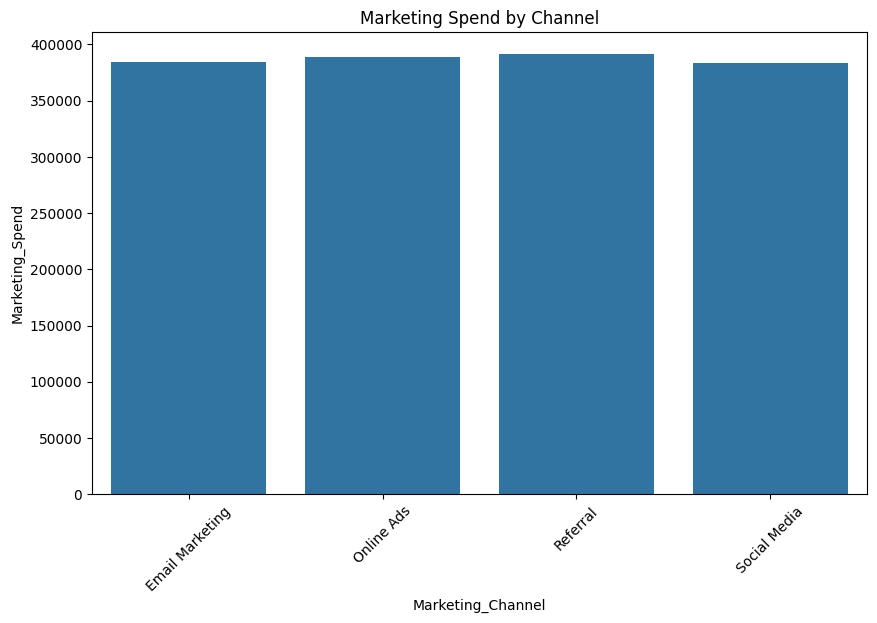

In [19]:
# Bar plot: Spend by Channel
plt.figure(figsize=(10,6))
sns.barplot(x='Marketing_Channel', y='Marketing_Spend', data=channel_performance)
plt.title('Marketing Spend by Channel')
plt.xticks(rotation=45)
plt.show()

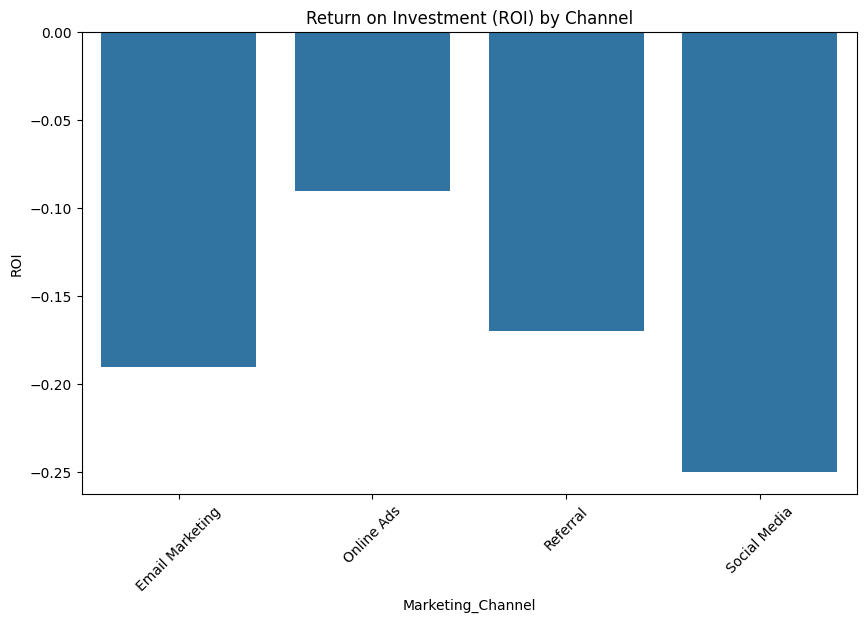

In [20]:
# Bar plot: ROI by Channel
plt.figure(figsize=(10,6))
sns.barplot(x='Marketing_Channel', y='ROI', data=channel_performance)
plt.title('Return on Investment (ROI) by Channel')
plt.xticks(rotation=45)
plt.show()

In [36]:
print(channel_performance.columns)

Index(['Marketing_Channel', 'Marketing_Spend', 'New_Customers',
       'Total_Revenue', 'Average_CAC', 'Average_LTV', 'ROI'],
      dtype='object')


In [37]:
# Find best channels
best_roi = channel_performance.loc[channel_performance['ROI'].idxmax(), 'Marketing_Channel']
lowest_cac = channel_performance.loc[channel_performance['Average_CAC'].idxmin(), 'Marketing_Channel']
highest_revenue = channel_performance.loc[channel_performance['Total_Revenue'].idxmax(), 'Marketing_Channel']

print(f"Best Performing Channel (Highest ROI): {best_roi}")
print(f"Most Cost-Effective Channel (Lowest CAC): {lowest_cac}")
print(f"Highest Revenue Channel: {highest_revenue}")

Best Performing Channel (Highest ROI): Online Ads
Most Cost-Effective Channel (Lowest CAC): Online Ads
Highest Revenue Channel: Online Ads


# Insights and Conclusion

- **Best Performing Channel**: Based on ROI, [Online Ads] was the most profitable.
- **Most Cost-Effective Channel**: Based on Average CAC, [Online Ads] acquired users at the lowest cost.
- **Highest Revenue Channel**: [Online Ads] generated the highest total revenue.

This analysis can guide marketing strategy by focusing more budget on high-performing acquisition channels.